<a href="https://colab.research.google.com/github/otitamario/sp-pa-gep/blob/main/notebooks/exp1_baseline_sppa_wppa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Clone the repository into Colab runtime
!git clone https://github.com/otitamario/sp-pa-gep.git

# Move into repo root
%cd sp-pa-gep

# Make sure Python sees the project root
import sys
sys.path.append(".")


Cloning into 'sp-pa-gep'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 39 (delta 9), reused 14 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 7.67 KiB | 7.67 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/sp-pa-gep


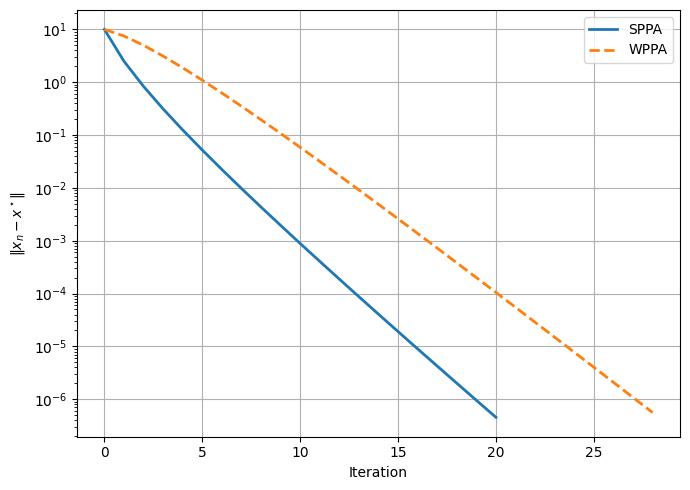

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from src.algorithms import SPPA, WPPA
from src.operators import resolvent_linear_identity
from src.utils import norm

# Problem parameters
n = 100
x_star = np.zeros(n)
x0 = np.ones(n)
u = np.zeros(n)
r = 1.0

# Halpern / Mann parameters
N = 500
alpha_seq = [1.0 / (k + 2) for k in range(N)]

# Run algorithms
hist_sppa = SPPA(x0, u, alpha_seq, r, resolvent_linear_identity)
hist_wppa = WPPA(x0, alpha_seq, r, resolvent_linear_identity)

# Errors
err_sppa = [norm(x - x_star) for x in hist_sppa]
err_wppa = [norm(x - x_star) for x in hist_wppa]

# Plot
plt.figure(figsize=(7,5))
plt.plot(err_sppa, label="SPPA", linewidth=2)
plt.plot(err_wppa, label="WPPA", linestyle="--", linewidth=2)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel(r"$\|x_n - x^\star\|$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: save figure
plt.savefig("figures/exp1_convergence.png", dpi=300, bbox_inches="tight")
